In [17]:
def plot_growth_curve(time, DATA_1, WCL, soluble, dilution_rate, group, member, legend_1, legend_2, x_label, y_label):
    DATA_1_np = np.array(DATA_1)
    
    slope_1, y_intercept_1 = np.polyfit(time,DATA_1_np,1) # m*x + b, m과 b를 return함
    print("np.polyfit(time,rpm_150_np,1): ", np.polyfit(time,DATA_1_np,1))
    poly1d_fn_1 = np.poly1d([slope_1, y_intercept_1]) 
    
    f1 = plt.figure(figsize=(12, 11))

    plt.plot(time, DATA_1,  color='black', marker='o',\
         linestyle=' ',  linewidth=2, markersize=12,  alpha=.5)
    plt.plot(time,DATA_1_np, 'ko', time, poly1d_fn_1(time), '-k')
    
    plt.title("Bradford Assay of WCL [group "+group+"]-"+member)
    plt.rc('font', size=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)

    y1 = np.array(slope_1)*time + np.array(y_intercept_1)
    R_squared_value_1 = r2_score(y1, DATA_1)
    
    plt.text(0.25, 0.25, "R squred value-1st: {:1.4f}".format(R_squared_value_1), fontsize=15)
    plt.text(0.25, 0.235, "y={:1.4f}x+({:1.4f})".format(slope_1, y_intercept_1), fontsize=15)
    txt="Figure 1. Lorem Ipsum is simply dummy text of the printing and typesetting industry."
    plt.text(.25, -0.05, txt, ha='center', size=15)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, lw = 2, ls = '--', c = '.85')
    plt.legend([legend_1])
    plt.show()
    
    return slope_1, y_intercept_1

np.polyfit(time,rpm_150_np,1):  [ 0.62925003 -0.00214866]


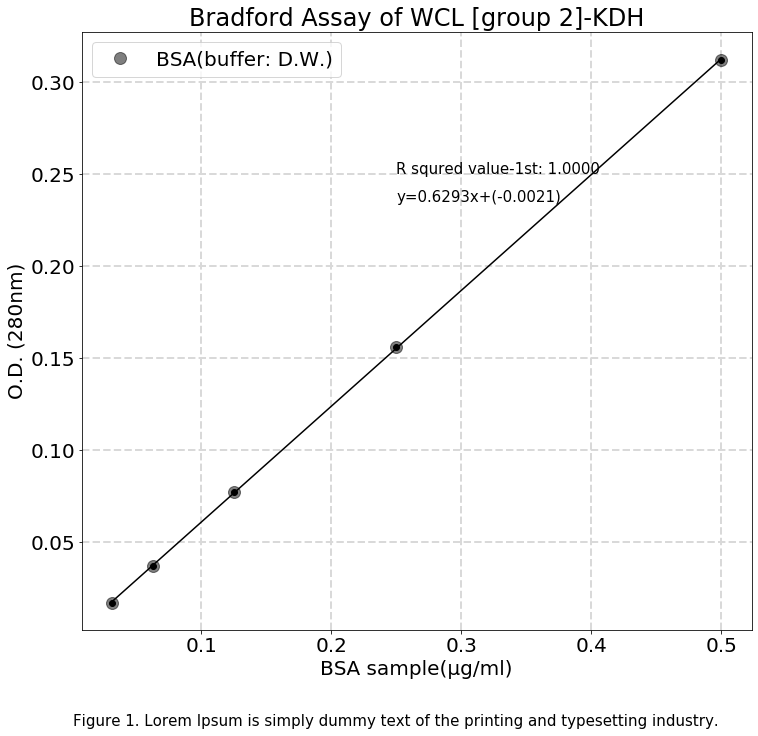

R squared value_1: 1.0000
WCL's conc: 5.7372
WSCL's conc: 3.8938


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

if __name__ == "__main__":    
    x_axis_scale = [0.0315,0.0625,0.125,0.25, 0.5]
    
    DATA_1 = [0.017, 0.037, 0.077, 0.156, 0.312]
    member = "KDH"
    
    WCL = 0.902
    soluble = 0.612
    dilution_rate = 4
    
    slope_1, y_intercept_1 = plot_growth_curve(x_axis_scale, DATA_1, WCL, dilution_rate, soluble, "2", member, "BSA(buffer: D.W.)", "0(μg/ml)", "BSA sample(μg/ml)", "O.D. (280nm)")
    
    WCL_real = WCL*dilution_rate
    soluble_real = soluble*dilution_rate
    WCL_x = (WCL_real+(-1)*y_intercept_1)/slope_1
    soluble_x = (soluble_real+(-1)*y_intercept_1)/slope_1
    
    y1 = np.array(slope_1)*x_axis_scale + np.array(y_intercept_1)
    
    R_squared_value_1 = r2_score(y1, DATA_1)
    print("R squared value_1: {:1.4f}".format(R_squared_value_1))
    print("WCL's conc: {:2.4f}".format(WCL_x))
    print("WSCL's conc: {:2.4f}".format(soluble_x))    

# WCL, WSCL
##### 20.06.18

In [195]:
def plot_growth_curve_bradford_assay_1(time, 
                                      DATA_1, 
                                      DATA_2, 
                                      DATA_3, 
                                      WCL, 
                                      soluble, 
                                      dilution_rate, 
                                      group, 
                                      member, 
                                      legend_1,  
                                      x_label, 
                                      y_label):
    DATA_1_np = np.array(DATA_1)
    DATA_2_np = np.array(DATA_2)
    DATA_3_np = np.array(DATA_3)
    
    slope_1, y_intercept_1 = np.polyfit(time,DATA_1_np,1) # m*x + b, m과 b를 return함
    slope_2, y_intercept_2 = np.polyfit(time,DATA_2_np,1)
    slope_3, y_intercept_3 = np.polyfit(time,DATA_3_np,1)
#     print("np.polyfit(time,DATA_1,1): ", np.polyfit(time,DATA_1_np,1))
#     print("np.polyfit(time,DATA_2,1): ", np.polyfit(time,DATA_2_np,1))
#     print("np.polyfit(time,DATA_3,1): ", np.polyfit(time,DATA_3_np,1))

    poly1d_fn_1 = np.poly1d([slope_1, y_intercept_1]) 
    poly1d_fn_2 = np.poly1d([slope_2, y_intercept_2]) 
    poly1d_fn_3 = np.poly1d([slope_3, y_intercept_3]) 
    
    f1 = plt.figure(figsize=(12, 11))

    plt.plot(time, DATA_1,  color='black', marker='o',\
         linestyle='-',  linewidth=2, markersize=12,  alpha=.5, label="1st")
    plt.plot(time, DATA_2,  color='black', marker='x',\
         linestyle='--',  linewidth=2, markersize=12,  alpha=.5, label="2nd")
    plt.plot(time, DATA_3,  color='black', marker='*',\
         linestyle=':',  linewidth=2, markersize=12,  alpha=.5, label="3rd")
    
    plt.title("Bradford Assay [group "+group+"]-"+member)
    plt.rc('font', size=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)

    y1 = np.array(slope_1)*time + np.array(y_intercept_1)
    R_squared_value_1 = r2_score(y1, DATA_1)
    y2 = np.array(slope_2)*time + np.array(y_intercept_2)
    R_squared_value_2 = r2_score(y2, DATA_2)
    y3 = np.array(slope_3)*time + np.array(y_intercept_3)
    R_squared_value_3 = r2_score(y3, DATA_3)
    
    txt="Figure 1. Standard curve of three experiment for the Bradford assay using BSA by {}.".format(member)
    plt.text(5, 0.2, txt, ha='center', size=15)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, lw = 2, ls = '--', c = '.85')
    
    plt.legend(fontsize='medium')
    plt.show()
    
    return slope_1, y_intercept_1, slope_2, y_intercept_2, slope_3, y_intercept_3

In [196]:
def plot_growth_curve_bradford_assay_2(time, 
                                      DATA_1, 
                                      DATA_2, 
                                      DATA_3, 
                                      WCL, 
                                      soluble, 
                                      dilution_rate, 
                                      group, 
                                      member, 
                                      legend_1,  
                                      x_label, 
                                      y_label):
    DATA_1_np = np.array(DATA_1)
    DATA_2_np = np.array(DATA_2)
    DATA_3_np = np.array(DATA_3)
    
    slope_1, y_intercept_1 = np.polyfit(time,DATA_1_np,1) # m*x + b, m과 b를 return함
    slope_2, y_intercept_2 = np.polyfit(time,DATA_2_np,1)
    slope_3, y_intercept_3 = np.polyfit(time,DATA_3_np,1)
    
#     print("np.polyfit(time,DATA_1,1): ", np.polyfit(time,DATA_1_np,1))
#     print("np.polyfit(time,DATA_2,1): ", np.polyfit(time,DATA_2_np,1))
#     print("np.polyfit(time,DATA_3,1): ", np.polyfit(time,DATA_3_np,1))

    poly1d_fn_1 = np.poly1d([slope_1, y_intercept_1]) 
    poly1d_fn_2 = np.poly1d([slope_2, y_intercept_2]) 
    poly1d_fn_3 = np.poly1d([slope_3, y_intercept_3]) 
    
    f1 = plt.figure(figsize=(15, 17))
    
    plt.title("Bradford Assay 1st-[group "+group+"]-"+member)
    plt.rc('font', size=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    
    y1 = np.array(slope_1)*time + np.array(y_intercept_1)
    R_squared_value_1 = r2_score(y1, DATA_1)
    plt.subplot(3,1,1)
    plt.plot(time, DATA_1,  color='black', marker='o',\
         linestyle=' ',  linewidth=2, markersize=12,  alpha=.5, label="1st")
    plt.plot(time,DATA_1_np, 'ko', time, poly1d_fn_1(time), '-k')
    plt.text(4.65, 0.445, "R squred value: {:1.4f}".format(R_squared_value_1), fontsize=15)
    plt.text(4.5, 0.475, "y={:1.4f}x+({:1.4f})".format(slope_1, y_intercept_1), fontsize=17)
    plt.grid(True, lw = 2, ls = '--', c = '.85')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(fontsize='medium')
    
    y2 = np.array(slope_2)*time + np.array(y_intercept_2)
    R_squared_value_2 = r2_score(y2, DATA_2)
    plt.subplot(3,1,2)
    plt.plot(time, DATA_2,  color='black', marker='x',\
         linestyle=' ',  linewidth=2, markersize=12,  alpha=.5, label="2nd")
    plt.plot(time,DATA_2_np, 'kx', time, poly1d_fn_1(time), '-k')
    plt.text(4.65, 0.445, "R squred value: {:1.4f}".format(R_squared_value_2), fontsize=15)
    plt.text(4.5, 0.475, "y={:1.4f}x+({:1.4f})".format(slope_2,y_intercept_2), fontsize=17)
    plt.grid(True, lw = 2, ls = '--', c = '.85')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(fontsize='medium')
    
    y3 = np.array(slope_3)*time + np.array(y_intercept_3)
    R_squared_value_3 = r2_score(y3, DATA_3)
    plt.subplot(3,1,3)
    plt.plot(time, DATA_3,  color='black', marker='*',\
         linestyle=' ',  linewidth=2, markersize=12,  alpha=.5, label="3rd")
    plt.plot(time,DATA_3_np, 'k*', time, poly1d_fn_1(time), '-k')
    plt.text(4.65, 0.445, "R squred value: {:1.4f}".format(R_squared_value_3), fontsize=15)
    plt.text(4.5, 0.475, "y={:1.4f}x+({:1.4f})".format(slope_3, y_intercept_3), fontsize=17)
    plt.grid(True, lw = 2, ls = '--', c = '.85')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(fontsize='medium')
    
    txt="Figure 2. Each Standard curve for the Bradford assay experiment using BSA by {}.".format(member)
    plt.text(5, 0.15, txt, ha='center', size=17)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, lw = 2, ls = '--', c = '.85')
    
    return slope_1, y_intercept_1, slope_2, y_intercept_2, slope_3, y_intercept_3

In [210]:
def plot_graph(member, x_axis_scale, DATA_set, dilution_times, PBS, WCL, WSCL):
    slope_1, y_intercept_1, slope_2, y_intercept_2, slope_3, y_intercept_3 \
    = plot_growth_curve_bradford_assay_1(time=x_axis_scale, 
                                         DATA_1=DATA_set[0], 
                                         DATA_2=DATA_set[1], 
                                         DATA_3=DATA_set[2], 
                                         WCL=WCL, 
                                         soluble=dilution_rate, 
                                         dilution_rate=soluble, 
                                         group="2", 
                                         member=member, 
                                         legend_1="BSA(buffer: D.W.)", 
                                         x_label="BSA sample(μg/ml)", 
                                         y_label="O.D. (595nm)")
    slope_1, y_intercept_1, slope_2, y_intercept_2, slope_3, y_intercept_3 \
    = plot_growth_curve_bradford_assay_2(time=x_axis_scale, 
                                         DATA_1=DATA_set[0], 
                                         DATA_2=DATA_set[1], 
                                         DATA_3=DATA_set[2], 
                                         WCL=WCL, 
                                         soluble=dilution_rate, 
                                         dilution_rate=soluble, 
                                         group="2", 
                                         member=member, 
                                         legend_1="BSA(buffer: D.W.)", 
                                         x_label="BSA sample(μg/ml)", 
                                         y_label="O.D. (595nm)")
    
    WCL_real = (np.array(WCL)+((-1.0)*PBS))*dilution_times
    WSCL_real = (np.array(WSCL)+((-1.0)*PBS))*dilution_times
    
    WCL_x = []
    WSCL_x = []

    WCL_x.append((WCL_real+(-1)*y_intercept_1)/slope_1)
    WCL_x.append((WCL_real+(-1)*y_intercept_2)/slope_2)
    WCL_x.append((WCL_real+(-1)*y_intercept_3)/slope_3)

    WSCL_x.append((WSCL_real+(-1)*y_intercept_1)/slope_1)
    WSCL_x.append((WSCL_real+(-1)*y_intercept_1)/slope_1)
    WSCL_x.append((WSCL_real+(-1)*y_intercept_1)/slope_1)
    
    y1 = np.array(slope_1)*x_axis_scale + np.array(y_intercept_1)
    y2 = np.array(slope_2)*x_axis_scale + np.array(y_intercept_2)
    y3 = np.array(slope_3)*x_axis_scale + np.array(y_intercept_3)
    
    R_squared_value_1 = r2_score(y1, DATA_1)
    R_squared_value_2 = r2_score(y2, DATA_2)
    R_squared_value_3 = r2_score(y3, DATA_3)
    
    print("standard deviation_1st: {:2.4f}".format(np.std(DATA_1)))
    print("standard deviation_2nd: {:2.4f}".format(np.std(DATA_2)))    
    print("standard deviation_3rd: {:2.4f}".format(np.std(DATA_3))) 
    print()
    print("R squared value_1st: {:1.4f}".format(R_squared_value_1))
    print("R squared value_2nd: {:1.4f}".format(R_squared_value_2))
    print("R squared value_3rd: {:1.4f}".format(R_squared_value_3))
    print()
    print("WCL's conc: {}".format(WCL_x))
    print("WSCL's conc: {}".format(WSCL_x))

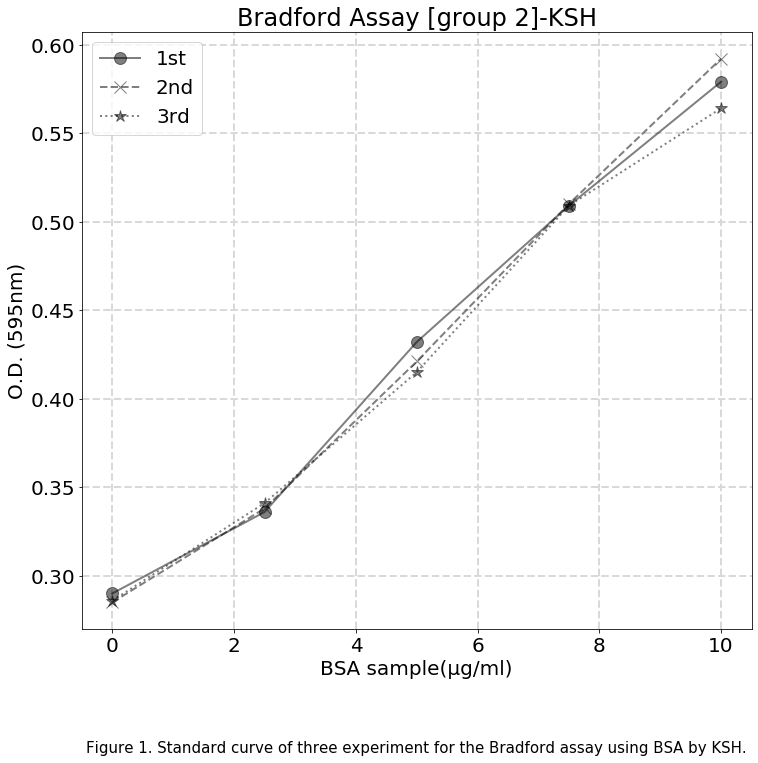

standard deviation_1st: 0.1067
standard deviation_2nd: 0.1115
standard deviation_3rd: 0.1028

R squared value_1st: 0.9915
R squared value_2nd: 0.9930
R squared value_3rd: 0.9921

WCL's conc: [array([114.54727031, 110.88548602, 115.21304927]), array([109.6692112 , 106.17048346, 110.30534351]), array([118.84668508, 115.04834254, 119.53729282])]
WSCL's conc: [array([101.56458056, 108.22237017, 106.22503329]), array([101.56458056, 108.22237017, 106.22503329]), array([101.56458056, 108.22237017, 106.22503329])]


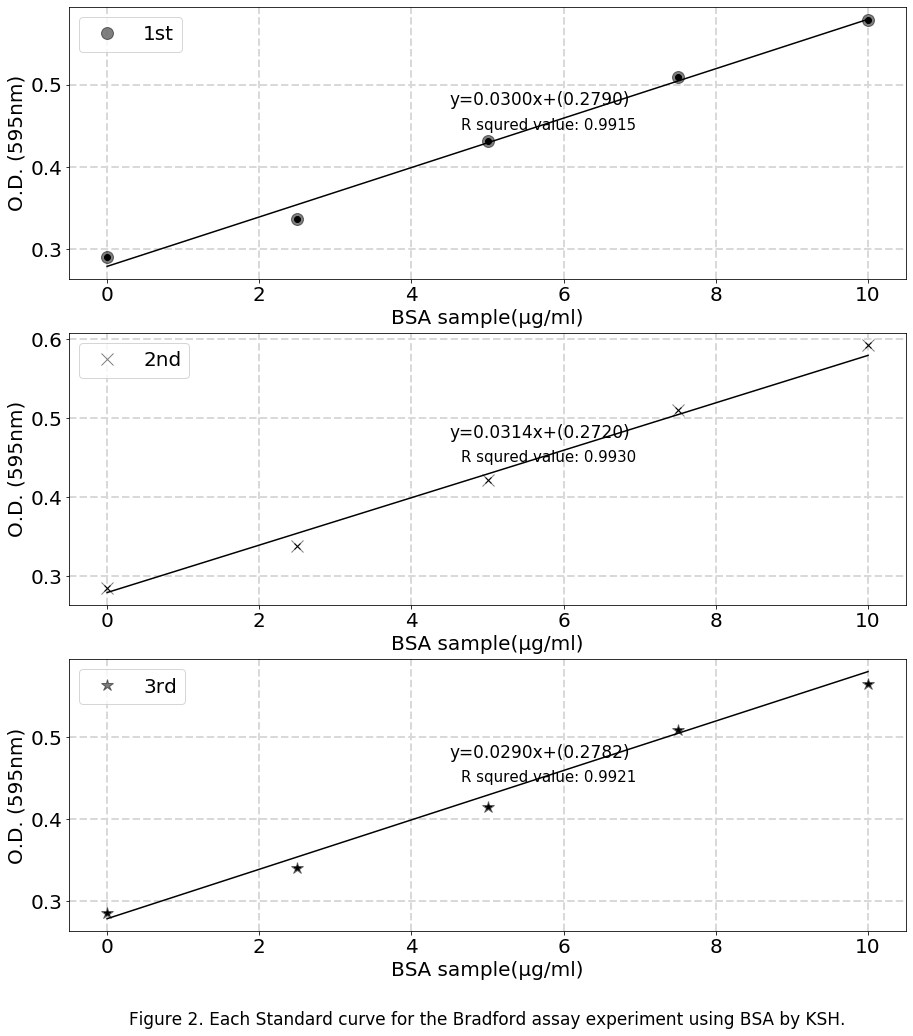

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

if __name__ == "__main__":    
    member = "KSH"
    
    x_axis_scale = [0.0,2.5,5.0,7.5,10.0]
    
    DATA_1 = [0.290,0.336,0.432,0.509,0.579]
    DATA_2 = [0.285,0.338,0.421,0.510,0.592]
    DATA_3 = [0.286,0.341,0.415,0.509,0.564]
    DATA_set = [DATA_1, DATA_2, DATA_3]
    
    dilution_times = 10
    PBS = 0.005
    
    WCL = [0.377, 0.366, 0.379]
    WSCL = [0.338, 0.358, 0.352]
    
    plot_graph(member, x_axis_scale, DATA_set, dilution_times, PBS, WCL, WSCL)

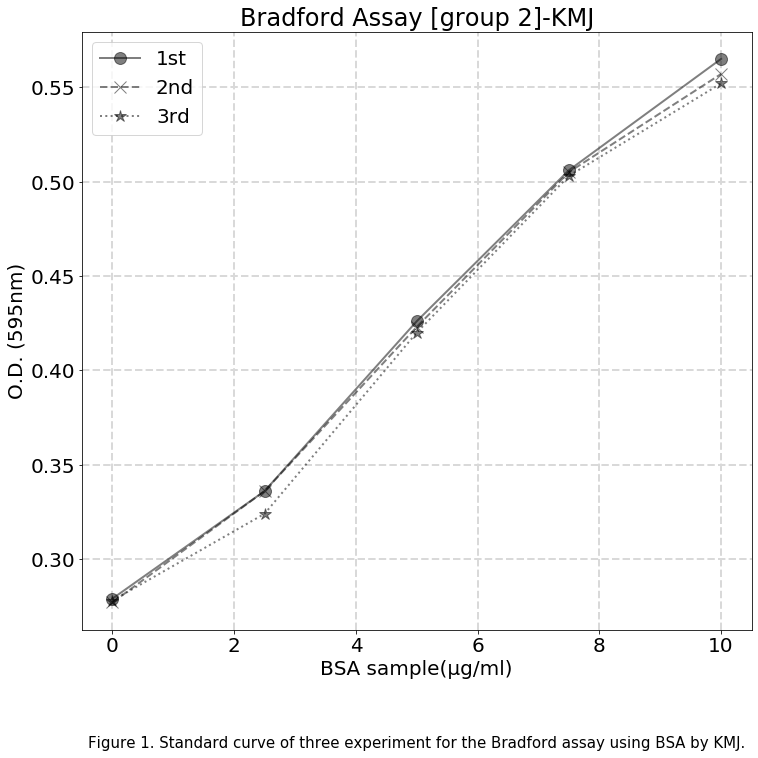

standard deviation_1st: 0.1052
standard deviation_2nd: 0.1034
standard deviation_3rd: 0.1035

R squared value_1st: 0.9944
R squared value_2nd: 0.9932
R squared value_3rd: 0.9861

WCL's conc: [array([ 95.21563342, 103.97574124, 104.98652291]), array([ 96.92043896, 105.83676269, 106.86556927]), array([ 97.31774415, 106.25859697, 107.29023384])]
WSCL's conc: [array([102.96495957, 100.606469  ,  96.22641509]), array([102.96495957, 100.606469  ,  96.22641509]), array([102.96495957, 100.606469  ,  96.22641509])]


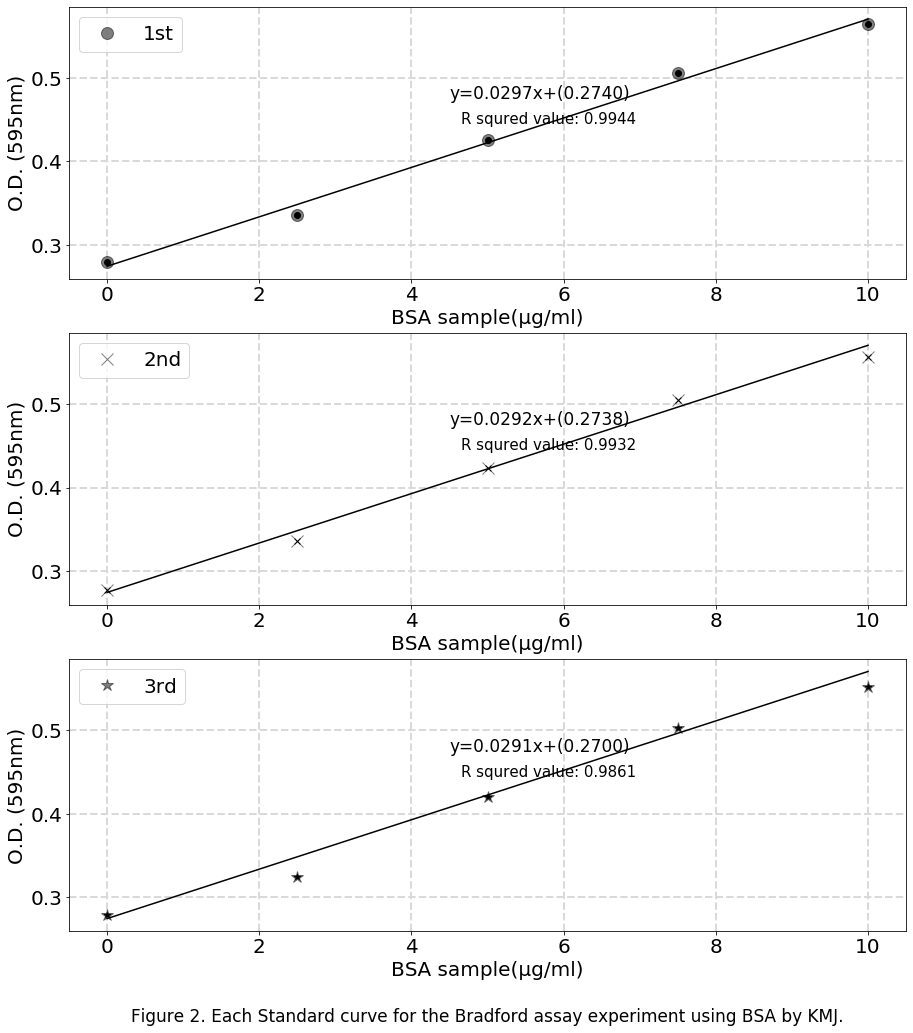

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

if __name__ == "__main__":    
    member = "KMJ"
    
    x_axis_scale = [0.0,2.5,5.0,7.5,10.0]
    
    DATA_1 = [0.279,0.336,0.426,0.506,0.565]
    DATA_2 = [0.277,0.336,0.423,0.505,0.557]
    DATA_3 = [0.278,0.324,0.420,0.503,0.552]
    DATA_set = [DATA_1, DATA_2, DATA_3]
    
    dilution_times = 10
    PBS = -0.004
    
    WCL = [0.306, 0.332, 0.335]
    WSCL = [0.329, 0.322, 0.309]
    
    plot_graph(member, x_axis_scale, DATA_set, dilution_times, PBS, WCL, WSCL)

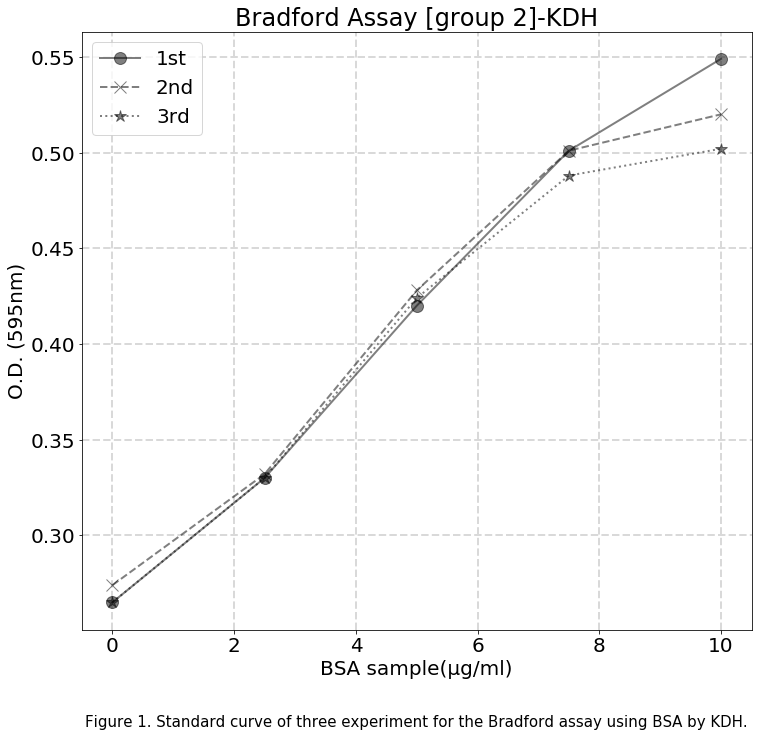

standard deviation_1st: 0.1050
standard deviation_2nd: 0.0952
standard deviation_3rd: 0.0915

R squared value_1st: 0.9914
R squared value_2nd: 0.9637
R squared value_3rd: 0.9527

WCL's conc: [array([114.50608931, 114.16779432, 114.8443843 ]), array([127.50378215, 127.12556732, 127.88199697]), array([133.48892405, 133.09335443, 133.88449367])]
WSCL's conc: [array([108.07848444, 108.41677943, 109.43166441]), array([108.07848444, 108.41677943, 109.43166441]), array([108.07848444, 108.41677943, 109.43166441])]


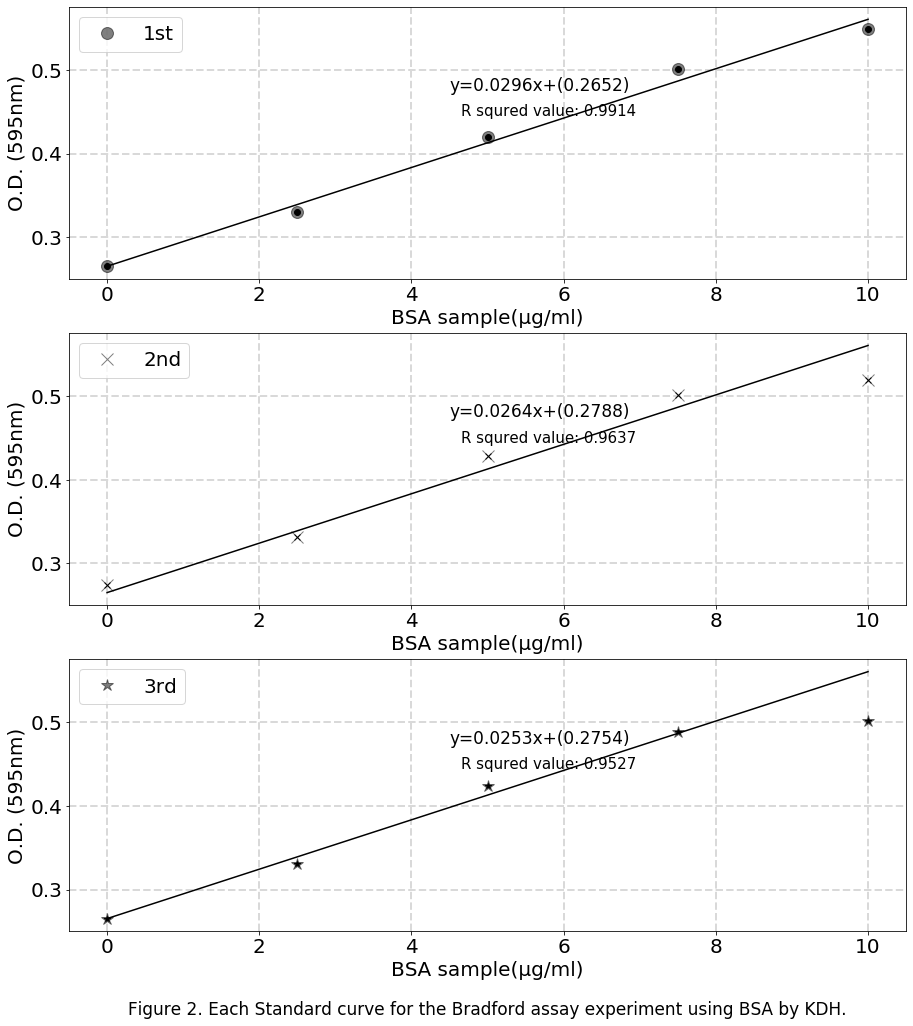

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

if __name__ == "__main__":    
    member = "KDH"
    
    x_axis_scale = [0.0,2.5,5.0,7.5,10.0]
    
    DATA_1 = [0.265,0.330,0.420,0.501,0.549]
    DATA_2 = [0.274,0.332,0.428,0.501,0.520]
    DATA_3 = [0.265,0.330,0.424,0.488,0.502]
    DATA_set = [DATA_1, DATA_2, DATA_3]
    
    dilution_times = 10
    PBS = -0.005
    
    WCL = [0.360, 0.359, 0.361]
    WSCL = [0.341, 0.342, 0.345]
    
    plot_graph(member, x_axis_scale, DATA_set, dilution_times, PBS, WCL, WSCL)